In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import drive

In [13]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/data/data_2d.csv'
file_path2 = '/content/drive/My Drive/data/mnist.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df_2d = pd.read_csv(file_path)
df_mnist = pd.read_csv(file_path2)

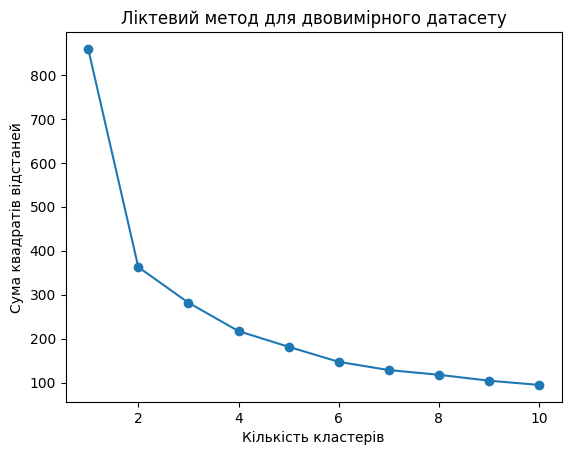

In [45]:
# Для двовимірного датасету
X_2d = df_2d.values
lss_2d = []

k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X_2d)
    lss_2d.append(kmeans.inertia_)

plt.plot(k_range, lss_2d, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Сума квадратів відстаней')
plt.title('Ліктевий метод для двовимірного датасету')
plt.show()


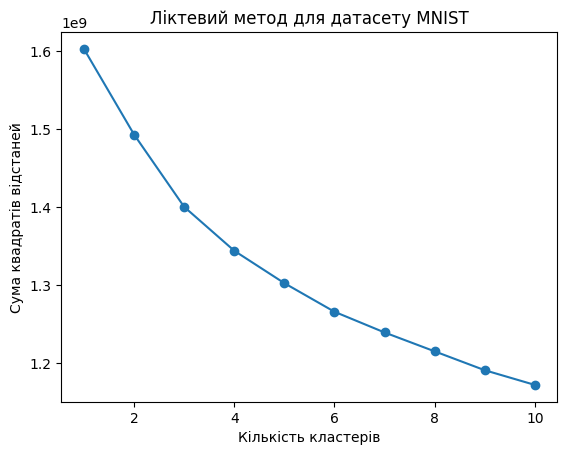

In [46]:
# Для датасету MNIST
X_mnist = df_mnist.values
lss_mnist = []

k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X_mnist)
    lss_mnist.append(kmeans.inertia_)

plt.plot(k_range, lss_mnist, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Сума квадратів відстаней')
plt.title('Ліктевий метод для датасету MNIST')
plt.show()


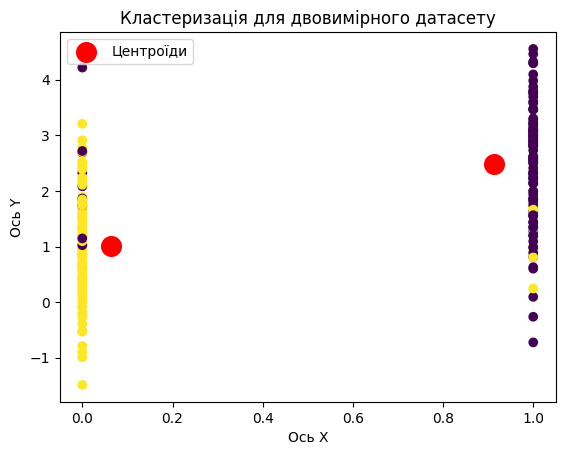

In [44]:
# Передбачення кластерів для двовимірного датасету
k_2d = 2  # Підставляемо сюди знайдене оптимальне значення
kmeans_2d = KMeans(n_clusters=k_2d, random_state=0, n_init=10)
labels_2d = kmeans_2d.fit_predict(X_2d)

# Візуалізація результатів для двовимірного датасету
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_2d, cmap='viridis')
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], s=200, c='red', label='Центроїди')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.title('Кластеризація для двовимірного датасету')
plt.legend()
plt.show()


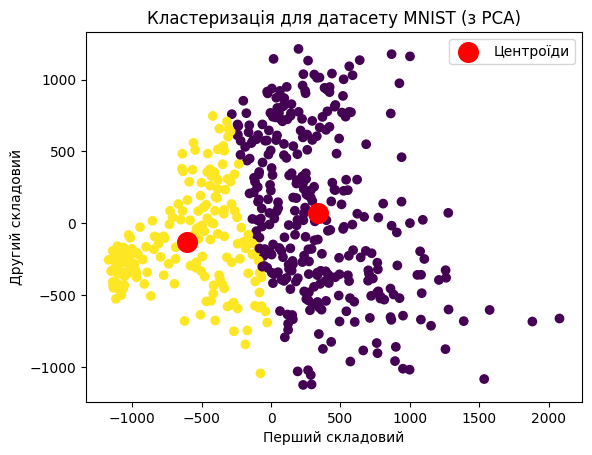

In [47]:
from sklearn.decomposition import PCA

# Зменшення розмірності датасету MNIST до 2D
pca = PCA(n_components=2)
X_mnist_2d = pca.fit_transform(X_mnist)

# Передбачення кластерів для датасету MNIST
k_mnist = 2  # Підставляемо сюди знайдене оптимальне значення
kmeans_mnist = KMeans(n_clusters=k_mnist, random_state=0, n_init=10)
labels_mnist = kmeans_mnist.fit_predict(X_mnist_2d)

# Візуалізація результатів для датасету MNIST
plt.scatter(X_mnist_2d[:, 0], X_mnist_2d[:, 1], c=labels_mnist, cmap='viridis')
plt.scatter(kmeans_mnist.cluster_centers_[:, 0], kmeans_mnist.cluster_centers_[:, 1], s=200, c='red', label='Центроїди')
plt.xlabel('Перший складовий')
plt.ylabel('Другий складовий')
plt.title('Кластеризація для датасету MNIST (з PCA)')
plt.legend()
plt.show()
